<a href="https://colab.research.google.com/github/luntrum/luntrum/blob/main/nhandienkhuonmat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Nguyễn Hữu Lộc

In [44]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten, BatchNormalization, LSTM
from keras import callbacks
from keras.callbacks import EarlyStopping,ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils

from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle

from tensorflow.keras.optimizers import Adam,RMSprop,SGD
from tensorflow.keras.utils import to_categorical ,load_img, img_to_array
from tensorflow.keras.models import load_model



import cv2
import matplotlib.pyplot as plt
import numpy as np
import pickle
import tensorflow as tf
import math as m
import os

In [52]:
drive.mount('/content/drive',force_remount=True)
training_DIR= '/content/drive/MyDrive/Colab Notebooks/nhandienkhuonmat/data/'
test_DIR='/content/drive/MyDrive/Colab Notebooks/nhandienkhuonmat/test/'

ANH_dir='/content/drive/MyDrive/Colab Notebooks/nhandienkhuonmat/data/ANH/'
GIAHUY_dir='/content/drive/MyDrive/Colab Notebooks/nhandienkhuonmat/data/GIAHUY/'
LIENHUULOC_dir='/content/drive/MyDrive/Colab Notebooks/nhandienkhuonmat/data/LIENHUULOC/'
LONGBUI_dir='/content/drive/MyDrive/Colab Notebooks/nhandienkhuonmat/data/LONGBUI/'
QuocBao_dir='/content/drive/MyDrive/Colab Notebooks/nhandienkhuonmat/data/QuocBao/'
TANLOC_dir='/content/drive/MyDrive/Colab Notebooks/nhandienkhuonmat/data/TANLOC/'
THANG_dir='/content/drive/MyDrive/Colab Notebooks/nhandienkhuonmat/data/THANG/'
VU_dir='/content/drive/MyDrive/Colab Notebooks/nhandienkhuonmat/data/VU/'
# pho_dir='/content/drive/MyDrive/Colab Notebooks/nhandienkhuonmat/data/pho/'
# thitluoc_dir='/content/drive/MyDrive/Colab Notebooks/nhandienkhuonmat/data/thitluoc/'


# print('total training ANH images:', len(os.listdir(ANH_dir)))
# print('total training LONGBUI images:', len(os.listdir(GIAHUY_dir)))
# print('total training bo images:', len(os.listdir(LIENHUULOC_dir)))

ANH_files = os.listdir(ANH_dir)
print(ANH_files[:50])

LONGBUI_files = os.listdir(LONGBUI_dir)
print(LONGBUI_files[:50])

LIENHUULOC_files = os.listdir(LIENHUULOC_dir)
print(LIENHUULOC_files[:50])

GIAHUY_files = os.listdir(GIAHUY_dir)
print(GIAHUY_files[:50])

QuocBao_files = os.listdir(QuocBao_dir)
print(QuocBao_files[:50])

TANLOC_files = os.listdir(TANLOC_dir)
print(TANLOC_files[:50])

THANG_files = os.listdir(THANG_dir)
print(THANG_files[:50])

VU_files = os.listdir(VU_dir)
print(VU_files[:50])

# pho_files = os.listdir(pho_dir)
# print(pho_files[:50])

# thitluoc_files = os.listdir(thitluoc_dir)
# print(thitluoc_files[:50])

Mounted at /content/drive
['ANH 1.jpg', 'ANH 2.jpg', 'ANH 4.jpg', 'ANH 3.jpg', 'ANH 5.jpg', 'ANH 6.jpg', 'ANH 7.jpg', 'ANH 9.jpg', 'ANH 8.jpg', 'ANH 10.jpg', 'ANH 11.jpg', 'ANH 13.jpg', 'ANH 14.jpg', 'ANH 12.jpg', 'ANH 17.jpg', 'ANH 15.jpg', 'ANH 16.jpg', 'ANH 18.jpg', 'ANH 20.jpg', 'ANH 21.jpg', 'ANH 19.jpg', 'ANH 22.jpg', 'ANH 24.jpg', 'ANH 25.jpg', 'ANH 26.jpg', 'ANH 23.jpg', 'ANH 27.jpg', 'ANH 31.jpg', 'ANH 28.jpg', 'ANH 29.jpg', 'ANH 30.jpg', 'ANH 32.jpg', 'ANH 34.jpg', 'ANH 36.jpg', 'ANH 33.jpg', 'ANH 38.jpg', 'ANH 37.jpg', 'ANH 35.jpg', 'ANH 40.jpg', 'ANH 39.jpg', 'ANH 41.jpg', 'ANH 44.jpg', 'ANH 42.jpg', 'ANH 43.jpg', 'ANH 46.jpg', 'ANH 47.jpg', 'ANH 45.jpg', 'ANH 48.jpg', 'ANH 50.jpg', 'ANH 49.jpg']
['LONGBUI 11.jpg', 'LONGBUI 8.jpg', 'LONGBUI 27.jpg', 'LONGBUI 20.jpg', 'LONGBUI 7.jpg', 'LONGBUI 15.jpg', 'LONGBUI 23.jpg', 'LONGBUI 5.jpg', 'LONGBUI 17.jpg', 'LONGBUI 9.jpg', 'LONGBUI 16.jpg', 'LONGBUI 13.jpg', 'LONGBUI 31.jpg', 'LONGBUI 12.jpg', 'LONGBUI 19.jpg', 'LONGBUI 38.jpg

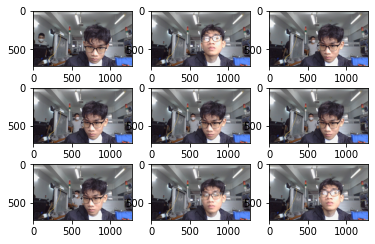

In [21]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
GIAHUY = '/content/drive/MyDrive/Colab Notebooks/nhandienkhuonmat/data/GIAHUY/'
for i in range(9):
  plt.subplot(330+i+1)
  filename = GIAHUY + 'HUY '+ str(i) + '.jpg'
  image = imread(filename)
  plt.imshow(image)
plt.show()

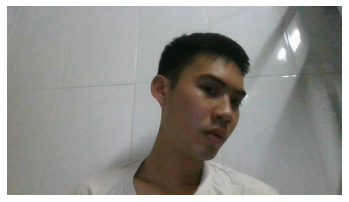

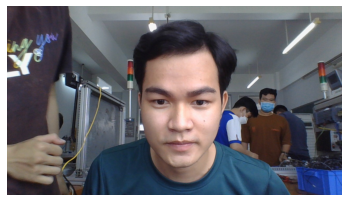

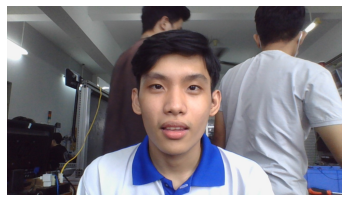

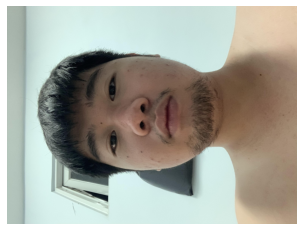

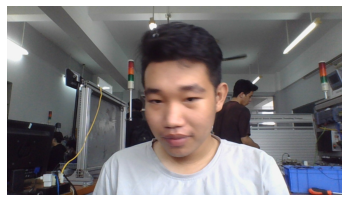

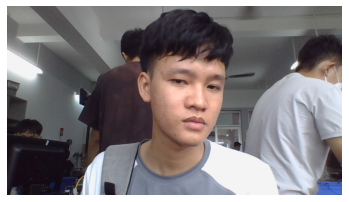

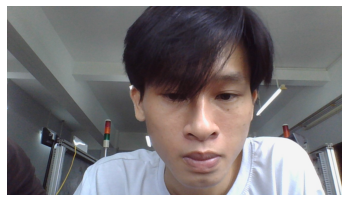

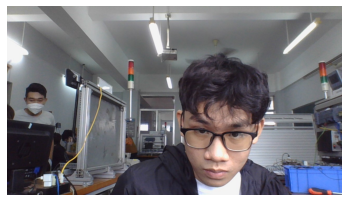

In [53]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 1

next_ANH = [os.path.join(ANH_dir, fname) 
                for fname in ANH_files[pic_index-1:pic_index]]
next_LONGBUI = [os.path.join(LONGBUI_dir, fname) 
                for fname in LONGBUI_files[pic_index-1:pic_index]]
next_LIENHUULOC = [os.path.join(LIENHUULOC_dir, fname) 
                for fname in LIENHUULOC_files[pic_index-1:pic_index]]
next_GIAHUY = [os.path.join(GIAHUY_dir, fname) 
                for fname in GIAHUY_files[pic_index-1:pic_index]]
next_QuocBao = [os.path.join(QuocBao_dir, fname) 
                for fname in QuocBao_files[pic_index-1:pic_index]]
next_TANLOC = [os.path.join(TANLOC_dir, fname) 
                for fname in TANLOC_files[pic_index-1:pic_index]]
next_VU = [os.path.join(VU_dir, fname) 
                for fname in VU_files[pic_index-1:pic_index]] 
next_THANG = [os.path.join(THANG_dir, fname) 
                for fname in THANG_files[pic_index-1:pic_index]]
# next_pho = [os.path.join(pho_dir, fname) 
#                 for fname in pho_files[pic_index-1:pic_index]]
# next_thitluoc = [os.path.join(thitluoc_dir, fname) 
#                 for fname in thitluoc_files[pic_index-1:pic_index]]

for i, img_path in enumerate(next_ANH+next_LONGBUI+next_LIENHUULOC+next_QuocBao+next_TANLOC+next_VU+next_THANG+next_GIAHUY):
  #print(img_path)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

In [54]:

training_datagen = ImageDataGenerator(
                                rotation_range=15,
                                rescale=1./255,
                                shear_range=0.1,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                width_shift_range=0.1,
                                height_shift_range=0.1)

train_generator = training_datagen.flow_from_directory(
	directory="/content/drive/MyDrive/Colab Notebooks/nhandienkhuonmat/data/",
	target_size=(150,150),
	class_mode='categorical',
  subset='training',
  shuffle=True
  # batch_size=336
)

VALIDATION_DIR ="/content/drive/MyDrive/Colab Notebooks/nhandienkhuonmat/test/"
# validation_datagen = ImageDataGenerator(rescale = 1./255)
validation_generator = training_datagen.flow_from_directory(
	directory="/content/drive/MyDrive/Colab Notebooks/nhandienkhuonmat/test/",
	target_size=(150,150),
	class_mode='categorical',
  subset='validation',
  shuffle=True
  # batch_size=336
)

Found 400 images belonging to 8 classes.
Found 0 images belonging to 8 classes.


In [114]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator



model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.25),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 400 neuron hidden layer
    tf.keras.layers.Dense(400, activation='relu'),
    tf.keras.layers.Dense(8, activation='softmax')
])

model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 74, 74, 64)       0         
 g2D)                                                            
                                                                 
 dropout_40 (Dropout)        (None, 74, 74, 64)        0         
                                                                 
 conv2d_33 (Conv2D)          (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 dropout_41 (Dropout)        (None, 36, 36, 64)       

In [115]:
history = model.fit(train_generator,batch_size=10, epochs=50, validation_data = validation_generator, verbose = 0.5)


Epoch 1/50
Epoch 2/50
Epoch 3/50
Epoch 4/50
Epoch 5/50
Epoch 6/50
Epoch 7/50
Epoch 8/50
Epoch 9/50
Epoch 10/50
Epoch 11/50
Epoch 12/50
Epoch 13/50
Epoch 14/50
Epoch 15/50
Epoch 16/50
Epoch 17/50
Epoch 18/50
Epoch 19/50
Epoch 20/50
Epoch 21/50
Epoch 22/50
Epoch 23/50
Epoch 24/50
Epoch 25/50
Epoch 26/50
Epoch 27/50
Epoch 28/50
Epoch 29/50
Epoch 30/50
Epoch 31/50
Epoch 32/50
Epoch 33/50
Epoch 34/50
Epoch 35/50
Epoch 36/50
Epoch 37/50
Epoch 38/50
Epoch 39/50
Epoch 40/50
Epoch 41/50
Epoch 42/50
Epoch 43/50
Epoch 44/50
Epoch 45/50
Epoch 46/50
Epoch 47/50
Epoch 48/50
Epoch 49/50
Epoch 50/50


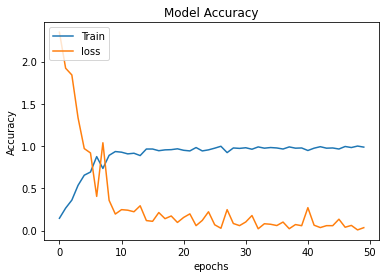

In [116]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
#plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.legend(['Train','loss'],loc='upper left')
plt.show()

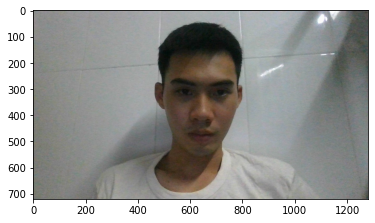

Đây là duy ánh


In [72]:
filename = '/content/drive/MyDrive/Colab Notebooks/nhandienkhuonmat/test/ANH/ANH 101.jpg'  
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread(filename)
imgplot = plt.imshow(img)
plt.show()

img = load_img(filename,target_size = (250,250))
img = img_to_array(img)
img =  img.reshape(1,250,250,3)
img = img.astype('float32')
img = img/255
kq = np.argmax(model.predict(img),axis= -1)
if kq==0:
  print('Đây là duy ánh')
elif kq ==1:
  print('Day là Gia Huy')
elif kq ==2:
  print('Day là Liên Hữu Lộc')
elif kq ==3:
  print('Day là Long Bùi')
elif kq ==4:
  print('Day là Trí Toàn')
elif kq ==5:
  print('Day là Tấn Lộc')
elif kq ==6:
  print('Day là Thắng')
elif kq ==7:
  print('Day là Vũ')


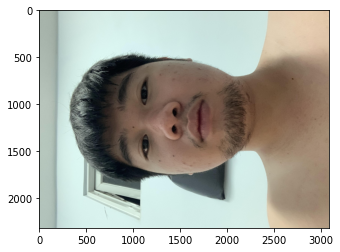

Day là Trí Toàn


In [90]:
filename = '/content/drive/MyDrive/Colab Notebooks/nhandienkhuonmat/test/QuocBao/3.JPG'  
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread(filename)
imgplot = plt.imshow(img)
plt.show()

img = load_img(filename,target_size = (400,400))
img = img_to_array(img)
img =  img.reshape(1,400,400,3)
img = img.astype('float32')
img = img/255
kq = np.argmax(model.predict(img),axis= -1)
if kq==0:
  print('Đây là duy ánh')
elif kq ==1:
  print('Day là Gia Huy')
elif kq ==2:
  print('Day là Liên Hữu Lộc')
elif kq ==3:
  print('Day là Long Bùi')
elif kq ==4:
  print('Day là Trí Toàn')
elif kq ==5:
  print('Day là Tấn Lộc')
elif kq ==6:
  print('Day là Thắng')
elif kq ==7:
  print('Day là Vũ')